# PROJECT
# Analysis of Personal Income and Expenditure in New York by Python 


#### The purpose of this project is to study the information of personal income and expenditure in New York, so we can know the living standard of NY. It contains two parts: income and expenditure. For each part we will do some data analysis and EDA. Finally, we will get the overall conclusion about our research. 
#### The data comes from three different sources, for income data we download the csv files in one website, for expenditure data we use web API and  scraping the website into html file.


### Income data analysis in New York

In [1]:
# import all the modules that we need in this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import geocoder
import folium

#### Part 1: Income by gender

In [2]:
# Download the csv data from website and upload to Github
# Read the csv file from Gibhit
gender = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Wage%20by%20Gender%20in%20Common%20Jobs.csv')

# to clean and transfer the data, we need to drop the data that we do not need 
gender = gender.drop(columns = ['ID Year','ID Gender', 'Employment Time Status','ID Employment Time Status','ID Detailed Occupation','Average Wage Appx MOE','Total Population MOE Appx', 'Record Count','ID Geography'])

# use gender.head() to print the answer
gender.head()

,Gender,Year,Detailed Occupation,Average Wage,Total Population,Geography
0,Male,2017,Retail salespersons,50004.664322,70791,New York
1,Female,2017,Retail salespersons,41425.703378,50084,New York
2,Female,2017,"Nursing, psychiatric, & home health aides",29463.650346,151487,New York
3,Female,2017,Miscellaneous managers,97162.749970,91553,New York
4,Female,2017,Elementary & middle school teachers,69458.339533,187210,New York


In [3]:
# use groupby to get the Average Wage of male and female separately in different years
gender.groupby(['Year', 'Gender'])['Average Wage'].mean()

Year  Gender
2014  Female    52758.135608
      Male      65888.677753
2015  Female    52637.719147
      Male      64293.934503
2016  Female    54569.377438
      Male      65882.567252
2017  Female    56818.266326
      Male      68020.220297
Name: Average Wage, dtype: float64

From this statistical analysis, we can see in each year male income is more than female. And from 2014 to 2017, the income is increasing.

Text(0.5, 1.0, 'Average Wage by Gender and Year')

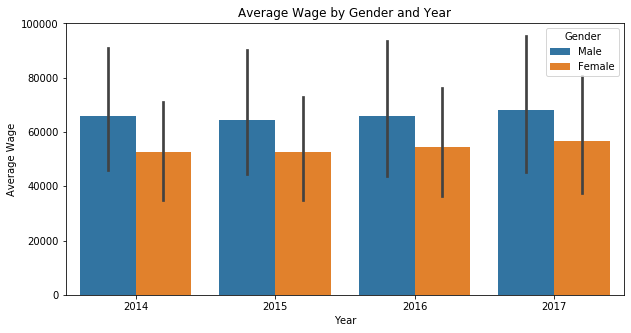

In [4]:
# use the data to make the barplot  
# grouping variable that will produce elements with different colors
# add title,xlabel,ylabel to the plot

plt.figure(figsize=(10,5))
sns.barplot(x="Year", y="Average Wage", hue="Gender", data=gender).set_title('Average Wage by Gender and Year')

From the plot we can see that the the average wage per year didn't change too much, and  male's wage is usually higher than female's.

#### Part 2: Income in race

In [5]:
#read the race csv file from Github
race = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Wage%20by%20Race%20and%20Ethnicity%20in%20Common%20Jobs.csv')

# to clean and transfer the data, we need to drop the data that we do not need 
race = race.drop(columns = ['ID Year','ID Race', 'Workforce Status','ID Workforce Status','ID Detailed Occupation','Average Wage Appx MOE','Total Population MOE Appx', 'Record Count','ID Geography'])

# use .head() to print the answer
race.head()

,Race,Year,Detailed Occupation,Average Wage,Total Population,Geography
0,Two or More Races,2017,Retail salespersons,17561.84615,4953,New York
1,Two or More Races,2017,Secretaries & administrative assistants,34295.05522,4962,New York
2,Two or More Races,2017,"Nursing, psychiatric, & home health aides",25519.74846,9923,New York
3,Two or More Races,2017,Miscellaneous managers,110063.70080,4225,New York
4,Two or More Races,2017,Elementary & middle school teachers,79445.16087,4948,New York


In [6]:
# use groupby to get the average wage of different race in differnet Occupations
race.groupby(['Detailed Occupation'])['Average Wage'].mean()

Detailed Occupation
Elementary & middle school teachers          59882.354607
Miscellaneous managers                       86552.750617
Nursing, psychiatric, & home health aides    23876.516885
Retail salespersons                          25396.394398
Secretaries & administrative assistants      38658.626765
Name: Average Wage, dtype: float64

From the statistical analysis, we can see the highest income occupation is miscellaneous managers and the total income average wage is 86552.750617. The lowest income occupation is nursing, psychiatric, & home health aides and the average wage is 23876.516885.

Text(0.5, 1.0, 'Average Wage by Job and Race')

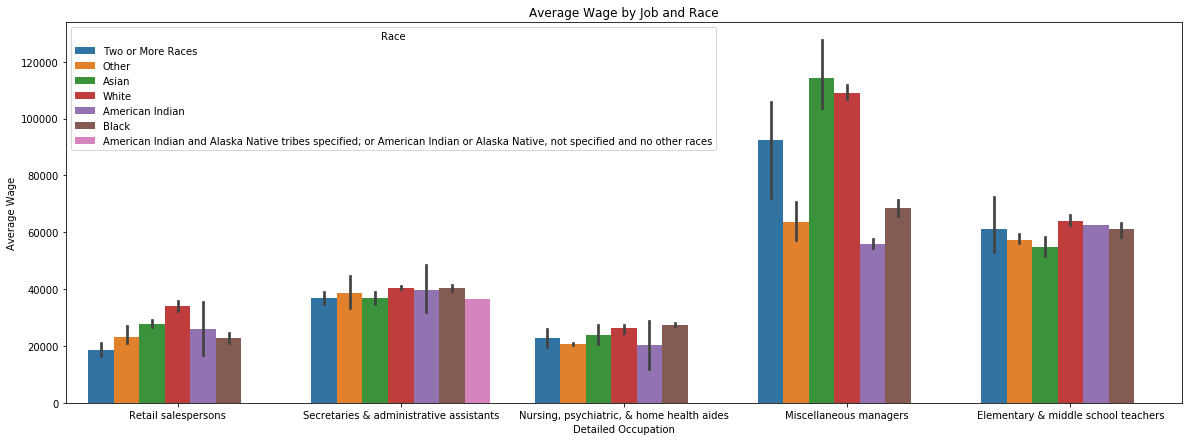

In [7]:
# use the data to get the barplot  
# Grouping variable that will produce elements with different colors
# add title,xlabel,ylabel to the plot
plt.figure(figsize=(20,7))
sns.barplot(x="Detailed Occupation", y="Average Wage", hue="Race", data=race).set_title('Average Wage by Job and Race')

This graphic shows that in different jobs the wage is different. The Miscellanoues managers have the highest average wage among these jobs, and  Nursing, psychiatric & home health aids jobs earn least. In addition, even in the same job, wage can be different in different races. White people have the highest average wage, and the American Indian may be the cheapest labor. 

#### Part 3: Income distribution and comparison in New York and the United State

In [8]:
#read the race csv file from Github
disrtibution = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Wage%20Distribution.csv')

# to clean and transfer the data, we need to drop the data that we do not need 
disrtibution = disrtibution.drop(columns = ['ID Year', 'Total Population MOE Appx', 'Slug Geography','Record Count'])

#sorted the data by the wage bin
disrtibution.sort_values('ID Wage Bin', inplace=True)

# use .head() to print the answer
disrtibution.head()

,ID Wage Bin,Wage Bin,Year,ID Workforce Status,Workforce Status,Total Population,Geography,ID Geography,share
167,1,< $10K,2014,True,True,1096715,New York,04000US36,0.123042
63,1,< $10K,2016,True,True,18071160,United States,01000US,0.124292
65,1,< $10K,2016,True,True,996845,New York,04000US36,0.110766
33,1,< $10K,2017,True,True,948764,New York,04000US36,0.103788
21,1,< $10K,2017,True,True,17420601,United States,01000US,0.117932


Text(0.5, 1.0, 'Proportion of Wage Distribution')

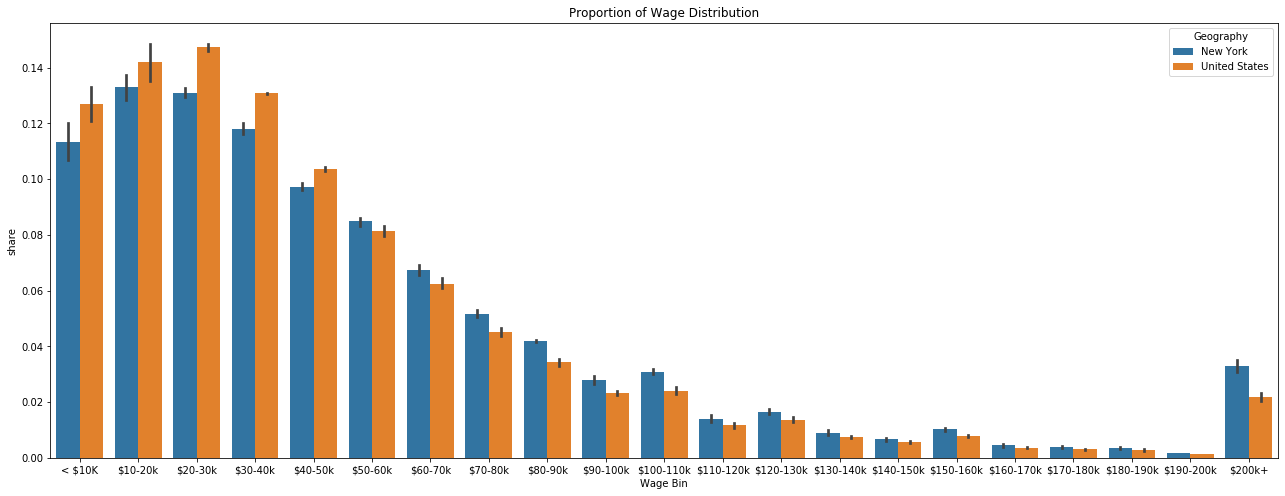

In [9]:
# use the data to get the barplot  
# Grouping variable that will produce elements with different colors
# add title,xlabel,ylabel to the plot

plt.figure(figsize=(22,8))
sns.barplot(x="Wage Bin", y="share", hue="Geography", data=disrtibution).set_title('Proportion of Wage Distribution')

This chart shows the number of workers in New York across various wage buckets compared to the national average. Most people's wages are concentrated below 70K in the whole country. Above wage bin 50k to 60k, the number of workers in New York begins to more than the United States. But for the lower wage distribution, the proportion of people in the US is higher than NY, which means that people in NY are more likely to earn the most. 

#### Part 4: Income in different counties in New York

In [10]:
#read the race csv file from Github
income = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Median%20Household%20Income.csv')
#use .head() to print the answer
income.head()

,ID Year,Year,Household Income by Race,Geography,ID Geography,Slug Geography
0,2017,2017,79201,"Richmond County, NY",05000US36085,richmond-county-ny
1,2017,2017,37397,"Bronx County, NY",05000US36005,bronx-county-ny
2,2017,2017,85071,"New York County, NY",05000US36061,new-york-county-ny
3,2017,2017,64509,"Queens County, NY",05000US36081,queens-county-ny
4,2017,2017,56942,"Kings County, NY",05000US36047,kings-county-ny


In [11]:
#import geocoder to get the latitude&logitude of each county in the dataframe
import geocoder
#use a for loop to get the latitude&ongitude
for i in income['Geography']:
    g = geocoder.arcgis(i)
    print(g.latlng)

[40.58076996900007, -74.15532724299999]
[40.84985000000006, -73.86640999999997]
[40.71455000000003, -74.00713999999994]
[40.71150317400003, -73.81994170099995]
[40.650100000000066, -73.94957999999997]
[40.650100000000066, -73.94957999999997]
[40.58076996900007, -74.15532724299999]
[40.84985000000006, -73.86640999999997]
[40.71455000000003, -74.00713999999994]
[40.71150317400003, -73.81994170099995]
[40.71150317400003, -73.81994170099995]
[40.650100000000066, -73.94957999999997]
[40.84985000000006, -73.86640999999997]
[40.58076996900007, -74.15532724299999]
[40.71455000000003, -74.00713999999994]
[40.650100000000066, -73.94957999999997]
[40.71455000000003, -74.00713999999994]
[40.84985000000006, -73.86640999999997]
[40.71150317400003, -73.81994170099995]
[40.58076996900007, -74.15532724299999]
[40.71150317400003, -73.81994170099995]
[40.58076996900007, -74.15532724299999]
[40.84985000000006, -73.86640999999997]
[40.650100000000066, -73.94957999999997]
[40.71455000000003, -74.00713999999

In [12]:
#import a folum to draw the map
import folium

#set the map location, zoom start size, tiles and the width
folium_map = folium.Map(location=[40.71455000000003, -74.00713999999994],
                        zoom_start=10,
                        tiles="CartoDB dark_matter",
                        width='50%')

# for each row in the data, add a cicle marker
#use a for loop to get each county's latitude and logitude
for index, row in income.iterrows():
    g = geocoder.arcgis(row['Geography'])
    

# generate the popup message that is shown on click.
    popup_text = "Year:{} <br> Household Income by Race:{} <br> Place:{}"
    popup_text = popup_text.format(row['Year'],
                                   row["Household Income by Race"],
                                   row["Geography"])

        
# radius of circles
    radius = row["Household Income by Race"] / 10    
    
# choose the color of the marker
#use if, elseif and else to seperate each year's color
    if row["Year"] == 2017:
        color="#E37222" 
    elif row["Year"] == 2016:
        color="#0A8A9F" 
    elif row["Year"] == 2015:
        color="#00FA9A"
    elif row["Year"] == 2014:
        color="#FFF8DC"
    else:
        color="#FF0000" 
        
# add marker to the map
    folium.Circle(location=(g.latlng),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)      

#print the folium map
folium_map

From the map we can see five counties in NY: Richmond County, NY, Bronx County, NY, New York County, NY, Queens County, NY and Kings County, NY. The bigger circle means the household income is higher. We can see that the biggest circle is in New York county and the smallest circle is in Bronx county, which means people in Manhattan earn more than Bronx and other counties, that makes sense. When you click the circle, you can see the different household income by each year. All the five counties' household income increased by years. And the highest household income is in New York county in 2017.

### Expenditure data anaysis in New York
#### Part 1: Recent years expenditure trend

In [13]:
#Scrap the web api
url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=economy.consumption.personal_consumption_expenditures&entity_id=0400000US42%2C0400000US36'
#test wether it worked
resp = requests.get(url)
resp

<Response [200]>

In [14]:
#convert data to JSON
data = resp.json()
data

{'data': {'rows': [{'c': [{'v': 1997},
     {'v': 412421, 'f': '$412,421 (Measured)'},
     {'v': True},
     {'v': 248278, 'f': '$248,278 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 1998},
     {'v': 435412, 'f': '$435,412 (Measured)'},
     {'v': True},
     {'v': 261665, 'f': '$261,665 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 1999},
     {'v': 463769, 'f': '$463,769 (Measured)'},
     {'v': True},
     {'v': 277253, 'f': '$277,253 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2000},
     {'v': 496495, 'f': '$496,495 (Measured)'},
     {'v': True},
     {'v': 296305, 'f': '$296,305 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2001},
     {'v': 518273, 'f': '$518,273 (Measured)'},
     {'v': True},
     {'v': 309684, 'f': '$309,684 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2002},
     {'v': 535432, 'f': '$535,432 (Measured)'},
     {'v': True},
     {'v': 320981, 'f': '$320,981 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2003},
     {'v': 562955, 

From this web api describtion, we can see that the value in 2015-2019 are forecasted. Cause we are now in 2019, compare the recent years economy, so we can treat the forecasted data as real.

In [15]:
# Extracted the content started from result
results = data['data']
results
# delete unuseful column and only choose the data we want
a = results['rows']
a

[{'c': [{'v': 1997},
   {'v': 412421, 'f': '$412,421 (Measured)'},
   {'v': True},
   {'v': 248278, 'f': '$248,278 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 1998},
   {'v': 435412, 'f': '$435,412 (Measured)'},
   {'v': True},
   {'v': 261665, 'f': '$261,665 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 1999},
   {'v': 463769, 'f': '$463,769 (Measured)'},
   {'v': True},
   {'v': 277253, 'f': '$277,253 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2000},
   {'v': 496495, 'f': '$496,495 (Measured)'},
   {'v': True},
   {'v': 296305, 'f': '$296,305 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2001},
   {'v': 518273, 'f': '$518,273 (Measured)'},
   {'v': True},
   {'v': 309684, 'f': '$309,684 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2002},
   {'v': 535432, 'f': '$535,432 (Measured)'},
   {'v': True},
   {'v': 320981, 'f': '$320,981 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2003},
   {'v': 562955, 'f': '$562,955 (Measured)'},
   {'v': True},
   {'v': 339358, 'f': '$339,358 (Me

In [16]:
#when reading the descirbtion of the web api, we want to 
#extract the data from columns: 'year','New York expenditure','Pennsylvania expenditure'

#create new lists
year = []
NY = []
Penn = []

#use a for loop to expand the list
for c in range(len(a)):
    cc = a[c]['c']
    #print(cc) 
    year.append(cc[0]['v'])
    NY.append(cc[1]['v'])
    Penn.append(cc[3]['v'])
    
#show the column name   
dict = {'year':year , 'NY':NY , 'Penn':Penn}

#print the new data into dataframe named Top
Top = pd.DataFrame(dict, columns=['year','NY','Penn'])
Top

,year,NY,Penn
0,1997,412421.000000,248278.000000
1,1998,435412.000000,261665.000000
2,1999,463769.000000,277253.000000
3,2000,496495.000000,296305.000000
4,2001,518273.000000,309684.000000
5,2002,535432.000000,320981.000000
6,2003,562955.000000,339358.000000
7,2004,595605.000000,357580.000000
8,2005,632211.000000,376511.000000
9,2006,664060.000000,394583.000000


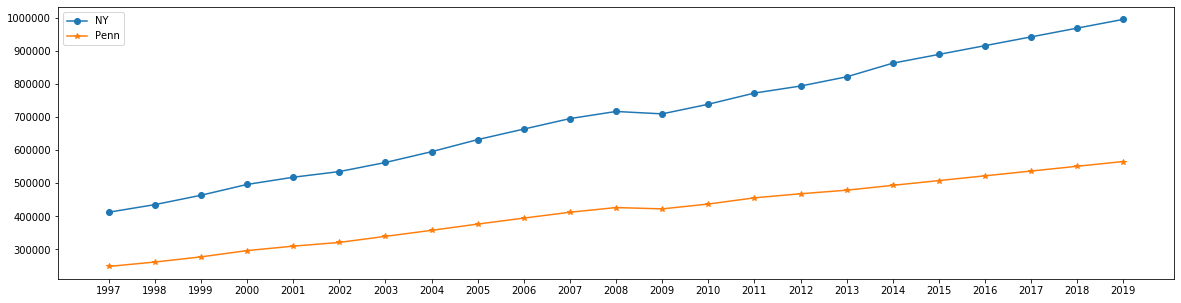

In [17]:
#draw a line plot to show the trend in recent year

#use figsize to decide the plot size
plt.figure(figsize=(20,5))
#add xlable as year and data from NY expenditure
plt.plot(Top['year'],Top['NY'],marker='o',label=u'NY')
#add xlable as year and data from Penn expenditure
plt.plot(Top['year'],Top['Penn'],marker='*',label=u'Penn')
#draw the legend()
plt.legend()
#set the x axis from 1997 to 2020 so that we can see the exact expenditure in 1997-2019
x = range(1997,2020,1)

#show the plt
plt.xticks(x,x)
plt.show()

From the lineplot we can see that the expenses in NY and Penn incresed all the time from 1997 to 2019, except for in 2008 which experienced a financial crisis. We compare NY and Penn because in the next part we will also compare NY and Washington, D.C. to the United State.

#### Part 2: Three most important expenses comparison(housing, transportation, food) 

In [18]:
#Scrap the web page into the html file and upload the html file to Github
#read Github to get the html data
tables = pd.read_html('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/html.html')

#the first item in the list is a data frame
html = tables[0]
html.head()

,Area,Housing,Transportation,Food
0,United States,33.0,16.0,12.9
1,Anchorage,31.5,15.7,12.6
2,Atlanta,32.8,16.3,11.5
3,Baltimore,32.3,15.8,11.9
4,Boston,37.5,12.0,12.1


In [19]:
# since the value of the html is strign, we need to clean the dataframe and transfer 
# the string values of Housing,Transportation and Food columns to int

html['Housing'] = pd.to_numeric(html['Housing'])
html['Transportation'] = pd.to_numeric(html['Transportation'])
html['Food'] = pd.to_numeric(html['Food'])

# to test the data type
#html['Food'].head()

In [20]:
# get the total expense proportion of Housing,Transportation,Food

html['Total'] = html.sum(axis=1)
html

,Area,Housing,Transportation,Food,Total
0,United States,33.0,16.0,12.9,61.9
1,Anchorage,31.5,15.7,12.6,59.8
2,Atlanta,32.8,16.3,11.5,60.6
3,Baltimore,32.3,15.8,11.9,60.0
4,Boston,37.5,12.0,12.1,61.6
5,Chicago,35.3,13.2,13.3,61.8
6,Dallas-Fort Worth,36.7,16.8,11.1,64.6
7,Denver,34.2,15.2,12.4,61.8
8,Detroit,30.1,19.3,12.3,61.7
9,Honolulu,38.0,10.9,18.1,67.0


In [21]:
# to get the city which has the max total percentage 

max_html = html[html['Total'] == max(html['Total'])]
max_html

,Area,Housing,Transportation,Food,Total
9,Honolulu,38.0,10.9,18.1,67.0


We choose the max total percentage city in the html dataframe, which is Honolulu. Honolulu is in Hawaii and for island housing and food may be more difficult to get than other cities. That makes sense.

In [22]:
# to get the city which has the min total percentage 

min_html = html[html['Total'] == min(html['Total'])]
min_html

,Area,Housing,Transportation,Food,Total
13,Minneapolis-St. Paul,33.6,12.9,11.6,58.1


For the min total percentage city is Minneapolis-Saint Paul which is built around the Mississippi, Minnesota and St. Croix rivers in east central Minnesota. This city is in low total expenditure because the economic level is not high.

In [23]:
# for further analysis, we need to tidy data
# and convert the data from wide to long

#melt the dataframe that each row only contains one value
html1 = html.melt(id_vars = ["Area"], value_vars = ['Housing','Transportation','Food','Total'])
#test and print the answer
html1.head()

,Area,variable,value
0,United States,Housing,33.0
1,Anchorage,Housing,31.5
2,Atlanta,Housing,32.8
3,Baltimore,Housing,32.3
4,Boston,Housing,37.5


In [24]:
# select column: United States,New York and Washington, D.C. 
# extract these three column to do comparison analysis

comparison = html1[(html1.Area == 'United States')|(html1.Area == 'New York')|(html1.Area == 'Washington, D.C.')]
comparison

,Area,variable,value
0,United States,Housing,33.0
14,New York,Housing,39.0
22,"Washington, D.C.",Housing,33.9
23,United States,Transportation,16.0
37,New York,Transportation,12.0
45,"Washington, D.C.",Transportation,14.4
46,United States,Food,12.9
60,New York,Food,12.3
68,"Washington, D.C.",Food,12.3
69,United States,Total,61.9


Text(0.5, 1.0, 'comparison of expenditures')

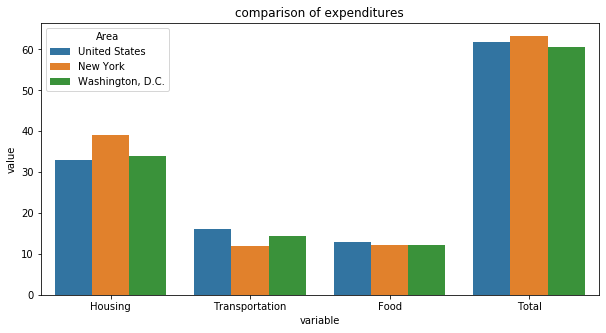

In [25]:
# use the data to get the barplot  
# Grouping variable that will produce elements with different colors
# add title,xlabel,ylabel to the plot

plt.figure(figsize=(10,5))

sns.barplot(x='variable',y='value',hue="Area",data=comparison).set_title('comparison of expenditures')

From this plot we can see that in housing proportion, NY is higher than the United States and Washington. But in transportation, NY is lower than the United States and Washington. That means in New York housing expenses is very high but New York transportation is very convenience. For the total consumption is almost 60%, which means in the US people still have additional money to enjoy their life. Also, in NY the total expenditure is higher than in the US.

### Conclusion
In conclusion, we use real data to verify the truth that people's income and expenditure increased year by year. For income, the average male's salary is always higher than the female's. There is also a difference in races, occupations, and counties. For expenditure, people's necessary expenditure for our daily life only takes up 62%, which means people in the US have a relatively higher living standard. Overall, although the personal income and expenditure in New York are both high, people still get extra money to enjoy their life.